# Text Classification Using Bag-of-Words and TF-IDF Models

![](https://i.imgur.com/hlEQ5X8.png)

> _"Natural Language Processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human (natural) languages, and specifically, how to program computers to fruitfully process and analyze large amounts of natural language data."_ - Wikipedia

> _**Bag of Words (BOW)**: The Bag of Words model is a representation that transforms any text into fixed-length vectors by counting how many times each word appears._

Plan:

1. Load and explore a real dataset
2. Apply text preprocessing techniques
3. Implement the Bag of Words model
4. Train machine learning models for text classification
5. Make predictions on training and testing, analyze the results.

Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

We are only working with `train.csv`.

Our task is to identify which content is toxic in order to improve online communication on the Quora platform.

## Loading and Exploring Data

In [1]:
import pandas as pd

In [4]:
train_fname = '../../data/nlp/quora/quora_train.csv.zip'
raw_df = pd.read_csv(train_fname)  # Reading data from CSV file

In [3]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


Let's explore the data that is not toxic.

In [5]:
sincere_df = raw_df[raw_df.target == 0]  # Filter the data where the target variable equals 0

In [6]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

Now those that are toxic.

In [7]:
insincere_df = raw_df[raw_df.target == 1]  # Filter data for insincere entries

In [8]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

What is the class balance in the dataset?

In [9]:
# Counting the frequencies of the target variable values with normalization

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

We see that we have fewer toxic ones.

### Create a working sample

In [10]:
ABBREVIATION = True

In [11]:
if SHORTEN:
    SAMPLE_SIZE = 100000
    raw_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
else:
    SAMPLE_SIZE = len(raw_df)

## Text Preprocessing

1. Understanding the "bag of words" model
2. Understanding the TF-IDF model
3. Tokenization
4. Stop word removal
5. Stemming

### Intuition of the Bag of Words (BoW) Text Vectorization Model

1. **Creating a word dictionary**: First, we create a list of all the words that appear in all text documents. This list can be considered a "dictionary" or "universe" of all words found in the dataset.

2. **Transforming a document into a vector**: Each document is transformed into a vector, where each element corresponds to the number of occurrences of a specific word from this dictionary in the document. If a word appears in the document 3 times, its corresponding value will be 3; if it does not appear at all, it will be 0.

![](https://vitalflux.com/wp-content/uploads/2021/08/Bag-of-words-technique-to-convert-to-numerical-feature-vector-png.png)

This method is effective if we simply want to count words, but it has a number of limitations that can affect the results of text analysis.

### Main Issues with the Bag of Words (BoW) Method

1. **Dimensionality of vectors**: If you have a large dataset with many documents, the dictionary will contain a huge number of unique words. This leads to very large vectors that are difficult to process and store. This problem is known as the "curse of dimensionality."

2. **Frequent but insignificant words (stop words)**: Some words (such as "and," "but," "this") appear very frequently across all documents but do not have much meaning for classification or analysis. In BoW, these words can have a high weight even if they do not carry semantic content.

3. **Rare but important words**: Conversely, some words may appear only in one document but be important for classification or understanding the content. For example, terms specific to a certain topic or document. In BoW, these words may have the same weight as less important words, which reduces the quality of the analysis.

4. **Multiple forms of words**: One word can have many different forms (e.g., "go," "gone," "going" or "bird" and "birds"). In BoW, all these forms will be treated as different words, increasing dimensionality and complicating analysis. This makes the model less robust to different forms of the same word.

Let's consider some examples.

In [12]:
q0 = sincere_df.question_text.values[1]  # Get the question text from the second row of the DataFrame

In [13]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [14]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]  # Get the question text for the target value 1

In [15]:
q1

'Is Yahoo owned by the Jews?'

### Tokenization

Tokenization is the process of breaking text into smaller units called tokens. Tokens can be individual words, phrases, or even characters.  
The goal of tokenization is to transform text into a structure that is convenient for further analysis and processing by NLP models. For example, the sentence "NLP is fun!" can be tokenized into ["NLP", "is", "fun", "!"].  
Tokenization allows each word or character to be considered as a separate unit for analysis.

We will use the nltk library here.

The **Natural Language Toolkit (NLTK)** library is one of the most popular libraries for natural language processing in Python. It offers a wide range of tools and resources for exploring and building NLP models.  
Link: https://www.nltk.org/

Key features of the NLTK library

1. **Tokenization**
 - Tools for breaking text into sentences or words (tokens). This includes basic tokenization methods based on spaces and punctuation, as well as more advanced methods to support different languages.

2. **Stemming and Lemmatization**
   - Support for various algorithms for stemming (e.g., the Porter algorithm, the Lancaster algorithm) and lemmatization (e.g., using WordNet dictionaries). These tools help normalize words to their base or root forms.

3. **Stop Words Removal**
   - A built-in list of stop words for various languages and tools for removing them from text to focus on more meaningful terms.

4. **Frequency Analysis**
   - Tools for counting the frequency of words and n-grams (sequences of n words) in text, which is useful for text analysis and identifying key terms or phrases.

5. **Part of Speech (POS) Tagging**
   - The ability to automatically determine the parts of speech (noun, verb, adjective, etc.) for each word in the text using built-in taggers (e.g., Perceptron Tagger, Maximum Entropy Tagger).

6. **Named Entity Recognition (NER)**
   - Tools for automatically identifying named entities in text, such as people, organizations, places, and other categories.

7. **Modeling Sentence Grammar Structure**
   - Tools for parsing sentences and constructing syntactic trees that show the grammatical structure of the sentence.

8. **Processing and Analyzing Text Corpora**
   - Built-in text corpora for training and testing NLP models, such as the "Brown Corpus," "Reuters Corpus," "Movie Reviews," as well as interfaces to external resources like WordNet.

9. **Machine Learning Algorithms for NLP**
   - The ability to use various machine learning algorithms (e.g., naive Bayes, decision trees) to solve NLP tasks such as text classification or sentiment analysis.

10. **Building n-gram Models**
    - Tools for creating models based on n-grams, which are used for predicting the next words or analyzing sequences in text.

11. **Data Visualization**
    - Tools for creating frequency plots of words, parse trees, and other visualizations for a deeper understanding of text data.

12. **Interfaces for Other Libraries**
    - Integration with other libraries and resources, such as WordNet, TextBlob, and other NLP tools.

Advantages of using NLTK:

- **Ease of Use:** NLTK has a simple and user-friendly interface for beginners in NLP, as well as a well-documented API.
- **Large Community:** NLTK has a large community of users and developers, which facilitates quick problem-solving and experience sharing.
- **Educational Resource:** With its rich documentation and numerous examples, NLTK is a popular choice for teaching natural language processing in universities and online courses.

In [ ]:
'NLP is interesting!'.replace('!', '').split()

['NLP', 'is', 'fun']

In [ ]:
import nltk

In [ ]:
import word_tokenize from nltk.tokenize

The Punkt Sentence tokenizer splits text into a list of sentences using an unsupervised algorithm to build a model for abbreviations, phrases, and words that start sentences. It needs to be trained on a large collection of open texts in the target language before use.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The point is smarter than the usual splitting of words by spaces.

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
text = '''
Punkt knows that the periods in Mr. Smith and Johann S. Bach
do not indicate sentence boundaries. Sometimes sentences
may start with a lowercase letter. i is a good variable
name.
'''
sent_detector = PunktSentenceTokenizer()
print('\n-----\n'.join(sent_detector.tokenize(text.strip())))

Punkt knows that the periods in Mr.
-----
Smith and Johann S. Bach
do not mark sentence boundaries.
-----
And sometimes sentences
can start with non-capitalized words.
-----
i is a good variable
name.


But we will tokenize down to the word, not to the sentence.

Our sentence before tokenization.

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

After.

In [ ]:
# Tokenize the text in the variable q0

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

This is really convenient!

In [ ]:
word_tokenize(' this (something) with a lot of punctuation;')

['this',
 'is',
 '(',
 'something',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [ ]:
q1

'Is Yahoo owned by the Jews?'

In [ ]:
word_tokenize(q1)  # Tokenization of question 1

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [ ]:
q0_tok = word_tokenize(q0)  # Tokenization of query 0
q1_tok = word_tokenize(q1)  # Tokenization of query 1

### Removal of Stop Words

**Stop words** are commonly used words that do not carry significant meaning and often do not provide important information for understanding the content of the text. Examples of stop words include: "and", "or", "but", "that", "if", "on", "in", "with", "to", "from", "I", "he", "she", etc.

In natural language processing (NLP) tasks, stop words are usually removed from the text to reduce data size and improve model efficiency. Removing stop words allows for a focus on more important, meaningful terms that help better recognize patterns in the text for various NLP tasks, such as text classification, sentiment analysis, or information retrieval.

In [ ]:
q1_tok

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [ ]:
import stopwords from nltk.corpus

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')  # English stop words

Let's review the list of stop words.

In [ ]:
", ".join(english_stop_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

By the way, Ukrainian stop words can be downloaded here - https://github.com/skupriienko/Ukrainian-Stopwords

Function for removing stop words.

In [ ]:
def remove_stopwords(tokens):
    # Returns a list of words without stop words
    return [word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q0_stp = remove_stopwords(q0_tok)  # remove stopwords

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q1_stp = remove_stopwords(q1_tok)  # remove stop words

In [ ]:
q1_tok

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [ ]:
q1_stp

['Yahoo', 'owned', 'Jews', '?']

### Stemming
**Stemming** is the process of reducing a word to its root or base form by removing suffixes or prefixes. For example, the words "running", "runner", "ran" are reduced to "run". Stemming is a less precise method as it uses heuristic rules to shorten words, which can lead to the creation of non-existent words (for example, "univers" from "universe" and "university").

In our case, we want to bring different forms of a word to one:

*   "go", "gone", "going" -> "go"  
*   "birds", "bird" -> "bird"

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')  # Stemmer for the English language

In [ ]:
# stemmer.stem('going')

'go'

In [ ]:
stemmer.stem('supposedly')  # stems the word 'supposedly'

'suppos'

In [ ]:
q0_stm = [stemmer.stem(word) for word in q0_stp]  # Stemming words in q0_stp

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stm = [stemmer.stem(word) for word in q1_stp]  # Stemming words in q1_stp

In [ ]:
q1_stp

['Yahoo', 'owned', 'Jews', '?']

In [ ]:
q1_stm

['yahoo', 'own', 'jew', '?']

### Lemmatization
There is an alternative to stemming - lemmatization.

**Lemmatization** is the process of transforming a word into its base or lemma form, considering its morphology and context in the sentence. For example, for the word "better," lemmatization will determine the base form as "good." Lemmatization is more formal and accurate than stemming, as it takes into account grammatical rules and dictionary usage.

Which method of word normalization to use should be decided for each task separately, considering its specifics and also experimenting and analyzing errors.

Another example of lemmatization:

  "love" -> "love"  
  "loving" -> "love"  
  "lovable" -> "love"  

## Implementation of Bag of Words
How we can independently implement vectorization with bag of words:

1. Create a dictionary using Count Vectorizer
2. Convert text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Creating a dictionary

In [ ]:
raw_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?', ...,
       'What are some services that will let you quickly separate parts of a video at the five minute and ten minute mark into two separate videos?',
       'What credit card processors do online marketplaces use?',
       'On which number system does a computer work?'], dtype=object)

In [ ]:
import CountVectorizer from sklearn.feature_extraction.text

In [ ]:
raw_vect = CountVectorizer()  # Initialization of the vectorizer for counting word frequency

In [ ]:
raw_vect_fit = raw_vect.fit(raw_df.question_text)  # Fitting the vectorizer to the question text from the dataframe

In [ ]:
raw_vect.get_feature_names_out()[10000:10010]

array(['cleaved', 'cleaveland', 'cleaver', 'cleen', 'clefs', 'cleft',
       'clemency', 'clemente', 'clementines', 'clemmensen'], dtype=object)

In [ ]:
raw_vect.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000001', '0005', '000501', '000czk', '001',
       '003', '003a'], dtype=object)

### Converting documents into vectors

In [ ]:
%%time
# vectors = transforming raw vectors into question text from the raw dataframe
vectors = raw_vect.transform(raw_df.question_text)

CPU times: user 1.62 s, sys: 16.9 ms, total: 1.64 s
Wall time: 1.85 s


In [ ]:
vectors

<100000x51543 sparse matrix of type '<class 'numpy.int64'>'
	with 1155416 stored elements in Compressed Sparse Row format>

In [ ]:
vectors.shape

(100000, 51543)

In [ ]:
raw_df.question_text.values[0]  # The first element of the question_text column in raw_df

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [ ]:
vectors[0].toarray()[0][100:110]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# vectors.toarray()

### Setting up Count Vectorizer parameters

In [ ]:
stemmer = SnowballStemmer(language='english')  # Stemmer for the English language

In [ ]:
def tokenize(text):
    # Returns a list of stemmed words from the text
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [ ]:
tokenize('What is the really (dealing) here?')  # Tokenize the input string

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [ ]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [ ]:
%%time
# The vectorizer is trained on the question text from raw_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 31.5 s, sys: 141 ms, total: 31.6 s
Wall time: 31.9 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x794b635eaf80>)

In [ ]:
# Number of unique words in the vectorizer's dictionary

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]  # Get the first 100 feature names

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [ ]:
%%time
# Inputs are the transformations of the question text from raw_df using the vectorizer
inputs = vectorizer.transform(raw_df.question_text)

CPU times: user 32.6 s, sys: 99.8 ms, total: 32.7 s
Wall time: 33 s


In [ ]:
input data.form

(100000, 1000)

In [ ]:
inputs[:10]

<10x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [ ]:
raw_df.question_text.values[0]  # get the question text from the first row

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [ ]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

To transform the test set, we could run the following code:

In [ ]:
%%time
# test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


## Training an ML Model for Text Classification

Plan:

- Create training and validation sets
- Train a logistic regression model
- Make predictions on training, validation, and test data

### Splitting into training and validation sets

In [ ]:
input data.form

(100000, 1000)

In [ ]:
import train_test_split from sklearn.model_selection

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, raw_df.target,
                                                                        test_size=0.3, random_state=42)  # Split the data into training and validation sets

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
train_targets.shape

(70000,)

In [ ]:
val_inputs.shape

(30000, 1000)

In [ ]:
val_targets.shape

(30000,)

### Training a Logistic Regression Model

In [ ]:
MAX_ITER = 1000

In [ ]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')  # Creating a logistic regression model with maximum iterations and 'sag' solver method

In [ ]:
%%time
# the model is trained on the input data and target values
model.fit(train_inputs, train_targets)

CPU times: user 20.9 s, sys: 24.9 ms, total: 21 s
Wall time: 21.5 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [ ]:
# Predictions for training data

In [ ]:
train_targets

,target
133883,0
343925,0
1190558,0
317078,0
355610,0
...,...
262505,0
879467,0
411614,0
859707,0


In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(train_preds).value_counts()  # Counting the number of unique values in train_preds

,count
0,67957
1,2043


In [ ]:
pd.Series(train_targets).value_counts()  # Counting the number of unique values in train_targets

,count
target,
0,65784
1,4216


In [ ]:
import accuracy_score, f1_score from sklearn.metrics

In [ ]:
accuracy_score(train_targets, train_preds)  # Calculate the accuracy of the model on the training data

0.9504428571428571

In [ ]:
f1_score(train_targets, train_preds)  # Calculate the F1 score for training targets and predictions

0.4457581083240134

Let's compare with a primitive model that states that every phrase is ecological (target=0):

In [ ]:
import numpy as np

In [ ]:
accuracy_score(train_targets, np.zeros(len(train_targets)))  # Calculation of accuracy for zero predictions

0.9397714285714286

In [ ]:
f1_score(train_targets, np.zeros(len(train_targets)))  # Calculation of F1 score for training target values and zero vector

0.0

### How to get predictions on new data?
It's simple! We transform the data with the trained vectorizer and pass it to the model.

In [ ]:
model.predict(vectorizer.transform(true_df.text_question.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# The model predicts probabilities for the first 10 questions in sincere_df
# We select probabilities for the positive class and round to 2 decimal places

array([0.07, 0.1 , 0.  , 0.02, 0.03, 0.04, 0.91, 0.04, 0.01, 0.02])

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
insincere_df.target.values[:10]  # First 10 values of the target variable

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Error Analysis

In [ ]:
# model prediction

In [ ]:
raw_df.shape

(100000, 4)

In [ ]:
import confusion_matrix from sklearn.metrics

In [ ]:
confusion_matrix(raw_df.target, raw_df.prediction)

array([[92985,   977],
       [ 4091,  1947]])

Let's further explore how the predictions for the target class=1 are distributed.

In [ ]:
# Obtaining prediction probabilities

In [ ]:
# Counting the number of values in the target variable

,count
target,
0,93962
1,6038


<Axes: >

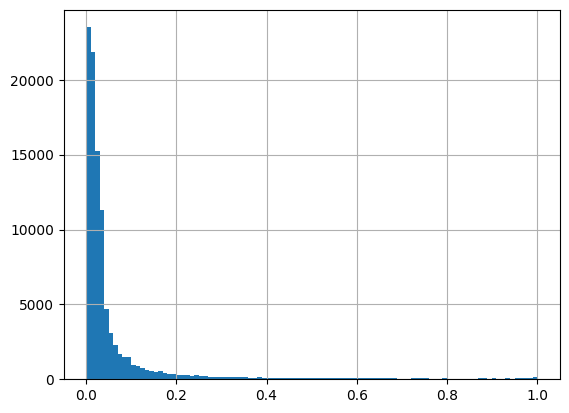

In [ ]:
raw_df.prediction_proba.hist(bins=100)  # Builds a histogram of prediction probabilities

I would shift the classification threshold to 0.1-0.2, and this would improve the F1 score.

In [ ]:
raw_df['prediction_0.2'] = raw_df.prediction_proba > 0.2  # Prediction if the probability exceeds 0.2

In [ ]:
f1_score(raw_df.target, raw_df['prediction_0.2'])

0.5161098296004167

In [ ]:
confusion_matrix(raw_df.target, raw_df['prediction_0.2'])  # confusion matrix

array([[90029,  3933],
       [ 2570,  3468]])

We can also separately investigate the issues where we make false positive and false negative predictions.

In [ ]:
raw_df['error'] = raw_df.target != raw_df['prediction_0.2']  # Create a column 'error' that shows whether the prediction is incorrect

False negative results can be obtained in the following way:

In [ ]:
raw_df[raw_df.error & raw_df.target==1]

,qid,question_text,target,prediction,prediction_proba,prediction_0.2,error
691951,8786fa2e795d2d0e1440,Is Yahoo owned by the Jews?,1,0,0.168223,False,True
1057714,cf41b3cc824bdc767b4b,"If Macedonia is supposedly ""purely"" Greek and ...",1,0,0.027378,False,True
30882,0609338dee541a017b5f,Could the numerous acts of arms being severed ...,1,0,0.025879,False,True
908188,b1f5208e0f44556a5964,Should plus-size women wear dresses and skirts...,1,0,0.124356,False,True
933912,b704f07087d87705b434,Why do we constantly get questions from gun-gr...,1,0,0.141718,False,True
...,...,...,...,...,...,...,...
840664,a4c0771befc0fdb5204c,It is not strange that there wasn’t any attemp...,1,0,0.197555,False,True
709348,8adf3b4c5f39625a1ed1,What was the real reason for Jesus to quit the...,1,0,0.004363,False,True
596632,74db98e51a653f6927c6,Is Astrologer R K Shastri Fraud?,1,0,0.031453,False,True
938680,b7f526728f983ee04683,Why do Sikhs hate Hindus?,1,0,0.150074,False,True


It will also be useful to perform an analysis of feature importance here. Words like `black`, `white`, `jews` are likely to contribute well to predicting that the question is non-ecological.

In [ ]:
feature_importance = pd.Series(model.coef_[0], index=vectorizer.get_feature_names_out(), name='imp').sort_values(ascending=False)
feature_importance

,imp
liber,2.476717
rape,2.372823
muslim,2.289466
obama,2.228544
atheist,1.909086
...,...
food,-1.149453
appli,-1.222220
affect,-1.251543
2017,-1.425562


In [ ]:
# Calculation of the logistic function for the value -10

0.9999546021312976

In [ ]:
# feature_importance[:10]

,imp
liber,2.476717
rape,2.372823
muslim,2.289466
obama,2.228544
atheist,1.909086
sister,1.844813
democrat,1.834140
jew,1.829017
trump,1.800324
gay,1.789857


The hypothesis has been confirmed, and now you can understand why your model makes certain predictions.

And conversely, these words reduce the likelihood that the question is non-ecological/toxic:

In [ ]:
# last 10 feature importances

,imp
situat,-1.015811
tv,-1.028620
refer,-1.044385
account,-1.052111
career,-1.105659
food,-1.149453
appli,-1.222220
affect,-1.251543
2017,-1.425562
?,-2.339836


# TF-IDF

Another method of vectorization.

TF-IDF (Term Frequency - Inverse Document Frequency) is a way to determine the importance of a word in a text, particularly in a set of texts (documents). Imagine you are reading many articles and want to understand which words are the most important in each of them.

### How does it work?

1. **Term Frequency (TF)**: This is the frequency with which a word appears in the text. For example, if the word "car" appears 3 times in an article of 100 words, then its TF = 3/100 = 0.03. TF shows how often a word is used in a specific document.

2. **Inverse Document Frequency (IDF)**: This is a measure that indicates how rare a word is across all documents. If the word "car" appears in all documents, its importance decreases. IDF is calculated as the logarithm of the ratio of the total number of documents to the number of documents where the word appears. If a word appears in many documents, its IDF will be low.

3. **TF-IDF**: Combines both measures — TF and IDF — to find words that frequently appear in a specific document but rarely in others. Such words are considered more important for understanding the content of a specific document.

![](https://miro.medium.com/v2/resize:fit:816/1*Cp46FtVZPkQANjdwmwr3fg.jpeg)

Thus, TF-IDF helps filter out words that are not very important to the content of the text (for example, "and", "or", "this") and focus on key terms that have greater significance.

Example of calculation
![](https://media.licdn.com/dms/image/D4D12AQF8sI1V68UsIQ/article-cover_image-shrink_600_2000/0/1677509695129?e=2147483647&v=beta&t=pDHLFUdBEFMD3q6K0eNgg_C_zPYYYxikomIN00cfTuo)

In [ ]:
# Our documents (texts)
documents = [
    "the car works very well",
    "the car and the person work together",
    "the person is riding in the car"
]

# Creating an object to compute TF-IDF
vectorizer = TfidfVectorizer()

# Calculating TF-IDF for our documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Displaying the results in a table format
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()).round(2)
tfidf_df

,добре,дуже,людина,машина,машині,на,працюють,працює,разом,та,їде
0,0.53,0.53,0.00,0.40,0.00,0.00,0.00,0.53,0.00,0.00,0.00
1,0.00,0.00,0.37,0.37,0.00,0.00,0.49,0.00,0.49,0.49,0.00
2,0.00,0.00,0.40,0.00,0.53,0.53,0.00,0.00,0.00,0.00,0.53


### Advantages of TF-IDF over Bag of Words

In BoW, we simply count how many times each word appears in the text. However, this method has several limitations:

1. **Ignores the importance of words**: In BoW, all words have the same weight, regardless of how often they appear in different documents. For example, the words "and", "in", "or" will be considered as important as the key words of the document.

2. **Does not take into account the overall frequency of the word**: In BoW, we do not consider whether a word appears frequently in many documents, and therefore it may not carry significant semantic weight.

**TF-IDF** addresses these issues by adding weight to words based on their frequency in a specific document and rarity across the entire set of documents. This makes TF-IDF more effective for highlighting important words and reducing the significance of commonly used words that do not carry much semantic load.

### Example comparing BoW and TF-IDF

Let's look at an example to see the difference between these two methods.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Наші документи (тексти)
documents = [
    "машина працює дуже добре",
    "машина та людина працюють разом",
    "людина їде на машині"
]

# Використання мішка слів (BoW)
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Використання TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Виведення результатів
print("Bag of Words (BoW):")
display(bow_df.round(2))

print("\nTF-IDF:")
tfidf_df.round(2)

Bag of Words (BoW):


,добре,дуже,людина,машина,машині,на,працюють,працює,разом,та,їде
0,1,1,0,1,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1,0,1,1,0
2,0,0,1,0,1,1,0,0,0,0,1



TF-IDF:


,добре,дуже,людина,машина,машині,на,працюють,працює,разом,та,їде
0,0.53,0.53,0.00,0.40,0.00,0.00,0.00,0.53,0.00,0.00,0.00
1,0.00,0.00,0.37,0.37,0.00,0.00,0.49,0.00,0.49,0.49,0.00
2,0.00,0.00,0.40,0.00,0.53,0.53,0.00,0.00,0.00,0.00,0.53


### Results

1. **Bag of Words (BoW)** matrix will show the number of times each word appears in each document. For example, the word "car" may have a value of 1 or 2 in different documents, regardless of its frequency across all documents.

2. **TF-IDF** matrix will show the weight of each word, where high values indicate that the word is important for a specific document but rarely appears in other documents. This allows for a better understanding of which words are truly significant for each document.

Thus, we can prioritize TF-IDF in some tasks, as this method highlights key words and helps to better understand text data, taking into account not only word frequency but also their significance.